In [105]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [106]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(60))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [107]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [108]:
%autosave 0

Autosave disabled


In [109]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [111]:
tcp_tls_data = "./data/VM/tls_perf/output_curl.csv"
quic_data = "./data/VM/quic_perf/output_quic.csv"

In [112]:
t = pd.read_csv(quic_data,';')
s = pd.read_csv(tcp_tls_data,';')

In [113]:
t = t.dropna()
s=s.dropna()

In [114]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [115]:
s.count()

TimeOfMeasurement              889207
Url                            889207
Ip                             889207
Port                           889207
DnsLookupTime                  889207
TCPHandshakeTime               889207
ConnectionEstablishmentTime    889207
TTFB                           889207
TotalDownloadTime              889207
HttpResponse                   889207
HTTPVersion                    889207
Protocol                       889207
dtype: int64

In [116]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1542745796,hostiq.ua,104.20.52.161,443,15.645,9.126,88.982,168.351,184.435,200,HTTP/1.1,TCP/TLS1.2
1,1542745796,hostiq.ua,104.20.52.161,443,4.170,9.156,72.739,158.040,174.138,200,HTTP/1.1,TCP/TLS1.3
2,1542745796,hostiq.ua,104.20.52.161,443,4.181,9.160,78.322,104.576,123.225,200,HTTP2,TCP/TLS1.2
3,1542745796,afrihost.com,104.20.30.244,443,4.149,9.161,66.767,836.976,836.999,301,HTTP/1.1,TCP/TLS1.3
4,1542745796,hostiq.ua,104.20.51.161,443,4.133,9.091,72.930,149.671,396.675,200,HTTP2,TCP/TLS1.3


In [117]:
t.count()

TimeOfMeasurement              19954729
Url                            19954729
Path                           19954729
Ip                             19954729
Port                           19954729
DNSTime                        19954729
ConnectionEstablishmentTime    19954729
TTFB                           19954729
TotalDownloadTime              19954729
HttpResponse                   19954729
Protocol                       19954729
dtype: int64

In [118]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044
1,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043
2,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039
3,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035
4,1.542733e+09,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044


In [119]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [120]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [121]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,15.645,9.126,88.982,168.351,184.435,200,HTTP/1.1,TCP/TLS1.2
1,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,4.170,9.156,72.739,158.040,174.138,200,HTTP/1.1,TCP/TLS1.3
2,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,4.181,9.160,78.322,104.576,123.225,200,HTTP2,TCP/TLS1.2
3,Tue Nov 20 20:29:56 2018,afrihost.com,104.20.30.244,443,4.149,9.161,66.767,836.976,836.999,301,HTTP/1.1,TCP/TLS1.3
4,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.51.161,443,4.133,9.091,72.930,149.671,396.675,200,HTTP2,TCP/TLS1.3


In [122]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
889202,Sun Jan 6 02:24:18 2019,www.zx6r.com,35.241.39.56,443,4.146,9.151,65.735,552.322,566.485,200,HTTP2,TCP/TLS1.2
889203,Sun Jan 6 02:24:18 2019,www.zynamics.com,172.217.22.14,443,4.175,8.940,70.974,114.709,115.999,200,HTTP/1.1,TCP/TLS1.2
889204,Sun Jan 6 02:24:18 2019,www.zynamics.com,172.217.22.14,443,4.141,8.968,69.882,114.819,115.431,200,HTTP2,TCP/TLS1.2
889205,Sun Jan 6 02:24:19 2019,www.zynamics.com,2a00:1450:4001:80b::200e,443,4.150,9.193,70.723,112.814,114.292,200,HTTP/1.1,TCP/TLS1.2
889206,Sun Jan 6 02:24:19 2019,www.zynamics.com,2a00:1450:4001:80b::200e,443,4.124,9.168,70.810,113.437,114.374,200,HTTP2,TCP/TLS1.2


In [123]:
t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [124]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Tue Nov 20 17:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044
1,Tue Nov 20 17:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043
2,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039
3,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035
4,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044


In [125]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843625,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,172.217.18.14,443.0,0.490,37.425,80.387,84.678,200.0,Q035
20843626,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,1.248,37.485,80.611,84.831,200.0,Q044
20843627,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.516,38.203,82.999,87.418,200.0,Q043
20843628,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.556,37.440,80.615,84.861,200.0,Q039
20843629,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.550,37.648,80.916,85.091,200.0,Q035


In [126]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [127]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [128]:
quic4.count()

TimeOfMeasurement              12158747
Url                            12158747
Path                           12158747
Ip                             12158747
Port                           12158747
DNSTime                        12158747
ConnectionEstablishmentTime    12158747
TTFB                           12158747
TotalDownloadTime              12158747
HttpResponse                   12158747
Protocol                       12158747
dtype: int64

In [129]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Tue Nov 20 17:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044
1,Tue Nov 20 17:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043
2,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039
3,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035
8,Tue Nov 20 17:00:05 2018,www.0dayrox.blogspot.com,/,216.58.214.33,443.0,17.386,37.093,194.005,198.128,301.0,Q044


In [130]:
quic6.count()

TimeOfMeasurement              7795982
Url                            7795982
Path                           7795982
Ip                             7795982
Port                           7795982
DNSTime                        7795982
ConnectionEstablishmentTime    7795982
TTFB                           7795982
TotalDownloadTime              7795982
HttpResponse                   7795982
Protocol                       7795982
dtype: int64

In [131]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
4,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044
5,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.543,38.079,245.425,249.597,301.0,Q043
6,Tue Nov 20 17:00:05 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.548,38.785,238.196,242.768,301.0,Q039
7,Tue Nov 20 17:00:05 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.685,37.735,261.156,265.396,301.0,Q035
12,Tue Nov 20 17:00:06 2018,www.0dayrox.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.468,36.324,212.228,216.408,301.0,Q044


In [132]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [133]:
tcp4.count()

TimeOfMeasurement              686591
Url                            686591
Ip                             686591
Port                           686591
DnsLookupTime                  686591
TCPHandshakeTime               686591
ConnectionEstablishmentTime    686591
TTFB                           686591
TotalDownloadTime              686591
HttpResponse                   686591
HTTPVersion                    686591
Protocol                       686591
dtype: int64

In [134]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,15.645,9.126,88.982,168.351,184.435,200,HTTP/1.1,TCP/TLS1.2
1,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,4.170,9.156,72.739,158.040,174.138,200,HTTP/1.1,TCP/TLS1.3
2,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,4.181,9.160,78.322,104.576,123.225,200,HTTP2,TCP/TLS1.2
3,Tue Nov 20 20:29:56 2018,afrihost.com,104.20.30.244,443,4.149,9.161,66.767,836.976,836.999,301,HTTP/1.1,TCP/TLS1.3
4,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.51.161,443,4.133,9.091,72.930,149.671,396.675,200,HTTP2,TCP/TLS1.3


In [135]:
tcp6.count()

TimeOfMeasurement              202616
Url                            202616
Ip                             202616
Port                           202616
DnsLookupTime                  202616
TCPHandshakeTime               202616
ConnectionEstablishmentTime    202616
TTFB                           202616
TotalDownloadTime              202616
HttpResponse                   202616
HTTPVersion                    202616
Protocol                       202616
dtype: int64

In [136]:
tcp6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
6,Tue Nov 20 20:29:56 2018,hostiq.ua,2606:4700:10::6814:34a1,443,12.208,9.084,80.579,104.295,119.824,200,HTTP/1.1,TCP/TLS1.2
7,Tue Nov 20 20:29:57 2018,hostiq.ua,2606:4700:10::6814:34a1,443,4.646,9.079,77.530,146.039,161.467,200,HTTP/1.1,TCP/TLS1.3
8,Tue Nov 20 20:29:57 2018,hostiq.ua,2606:4700:10::6814:34a1,443,4.163,9.082,84.875,107.958,126.623,200,HTTP2,TCP/TLS1.2
10,Tue Nov 20 20:29:57 2018,hostiq.ua,2606:4700:10::6814:34a1,443,4.130,9.118,77.913,111.705,126.740,200,HTTP2,TCP/TLS1.3
15,Tue Nov 20 20:29:57 2018,sometraf.com,2606:4700:30::6818:688c,443,12.285,9.108,69.603,92.421,97.911,200,HTTP/1.1,TCP/TLS1.2


In [137]:
quic44 = quic4.loc[t['Protocol'] == 'Q044']
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic39 = quic4.loc[t['Protocol'] == 'Q039']
quic35 = quic4.loc[t['Protocol'] == 'Q035']

In [138]:
quic44.count()

TimeOfMeasurement              2850894
Url                            2850894
Path                           2850894
Ip                             2850894
Port                           2850894
DNSTime                        2850894
ConnectionEstablishmentTime    2850894
TTFB                           2850894
TotalDownloadTime              2850894
HttpResponse                   2850894
Protocol                       2850894
dtype: int64

In [139]:
quic44.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Tue Nov 20 17:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044
8,Tue Nov 20 17:00:05 2018,www.0dayrox.blogspot.com,/,216.58.214.33,443.0,17.386,37.093,194.005,198.128,301.0,Q044
16,Tue Nov 20 17:00:07 2018,www.100leccionesdeguitarra.blogspot.com,/,216.58.214.33,443.0,28.336,36.701,167.254,171.494,301.0,Q044
32,Tue Nov 20 17:00:16 2018,www.104law.com,/,216.58.200.46,443.0,40.161,526.059,784.235,788.455,404.0,Q044
40,Tue Nov 20 17:00:23 2018,www.1100021.blogspot.com,/,216.58.214.33,443.0,17.114,39.000,233.530,237.687,301.0,Q044


In [140]:
quic44.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843594,Sun Jan 6 13:23:06 2019,www.zuhause-manufaktur.blogspot.com,/,216.58.206.1,443.0,17.058,36.399,228.354,232.602,301.0,Q044
20843602,Sun Jan 6 13:23:08 2019,www.zuhriindonesia.blogspot.com,/,216.58.206.1,443.0,17.005,36.536,200.954,205.323,301.0,Q044
20843610,Sun Jan 6 13:23:10 2019,www.zurichess.xyz,/,172.217.22.112,443.0,319.775,37.831,187.228,191.600,200.0,Q044
20843618,Sun Jan 6 13:23:11 2019,www.zx6r.com,/,35.241.39.56,443.0,75.933,23.153,635.487,650.499,200.0,Q044
20843622,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,172.217.18.14,443.0,0.516,36.587,79.641,83.919,200.0,Q044


In [141]:
quic43.count()

TimeOfMeasurement              3102381
Url                            3102381
Path                           3102381
Ip                             3102381
Port                           3102381
DNSTime                        3102381
ConnectionEstablishmentTime    3102381
TTFB                           3102381
TotalDownloadTime              3102381
HttpResponse                   3102381
Protocol                       3102381
dtype: int64

In [142]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,Tue Nov 20 17:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043
9,Tue Nov 20 17:00:05 2018,www.0dayrox.blogspot.com,/,216.58.214.33,443.0,0.568,38.140,199.250,203.637,301.0,Q043
17,Tue Nov 20 17:00:07 2018,www.100leccionesdeguitarra.blogspot.com,/,216.58.214.33,443.0,0.613,36.725,166.374,170.546,301.0,Q043
25,Tue Nov 20 17:00:10 2018,www.100negocios.com,/,66.198.240.11,443.0,0.708,227.398,340.541,457.459,200.0,Q043
29,Tue Nov 20 17:00:13 2018,www.101apps.co.za,/,89.145.92.16,443.0,0.557,89.642,7.573,51.988,200.0,Q043


In [143]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843595,Sun Jan 6 13:23:06 2019,www.zuhause-manufaktur.blogspot.com,/,216.58.206.1,443.0,0.704,37.996,194.149,198.366,301.0,Q043
20843603,Sun Jan 6 13:23:08 2019,www.zuhriindonesia.blogspot.com,/,216.58.206.1,443.0,0.587,38.245,201.474,205.731,301.0,Q043
20843611,Sun Jan 6 13:23:10 2019,www.zurichess.xyz,/,172.217.22.112,443.0,0.730,38.547,125.174,129.549,200.0,Q043
20843619,Sun Jan 6 13:23:12 2019,www.zx6r.com,/,35.241.39.56,443.0,0.521,23.806,995.508,24.173,200.0,Q043
20843623,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,172.217.18.14,443.0,0.557,39.891,85.285,89.616,200.0,Q043


In [144]:
quic39.count()

TimeOfMeasurement              3103041
Url                            3103041
Path                           3103041
Ip                             3103041
Port                           3103041
DNSTime                        3103041
ConnectionEstablishmentTime    3103041
TTFB                           3103041
TotalDownloadTime              3103041
HttpResponse                   3103041
Protocol                       3103041
dtype: int64

In [145]:
quic39.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039
10,Tue Nov 20 17:00:06 2018,www.0dayrox.blogspot.com,/,216.58.214.33,443.0,0.554,36.916,193.937,198.300,301.0,Q039
18,Tue Nov 20 17:00:07 2018,www.100leccionesdeguitarra.blogspot.com,/,216.58.214.33,443.0,0.487,37.362,774.353,778.499,301.0,Q039
26,Tue Nov 20 17:00:11 2018,www.100negocios.com,/,66.198.240.11,443.0,0.588,227.578,339.982,456.607,200.0,Q039
30,Tue Nov 20 17:00:14 2018,www.101apps.co.za,/,89.145.92.16,443.0,0.503,91.077,999.024,48.295,200.0,Q039


In [146]:
quic39.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843596,Sun Jan 6 13:23:07 2019,www.zuhause-manufaktur.blogspot.com,/,216.58.206.1,443.0,0.578,38.362,207.011,211.263,301.0,Q039
20843604,Sun Jan 6 13:23:08 2019,www.zuhriindonesia.blogspot.com,/,216.58.206.1,443.0,0.601,35.611,202.556,208.019,301.0,Q039
20843612,Sun Jan 6 13:23:10 2019,www.zurichess.xyz,/,172.217.22.112,443.0,0.617,37.783,107.832,112.122,200.0,Q039
20843620,Sun Jan 6 13:23:15 2019,www.zx6r.com,/,35.241.39.56,443.0,0.515,22.288,506.480,529.793,200.0,Q039
20843624,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,172.217.18.14,443.0,0.544,37.697,80.298,84.495,200.0,Q039


In [147]:
quic35.count()

TimeOfMeasurement              3102431
Url                            3102431
Path                           3102431
Ip                             3102431
Port                           3102431
DNSTime                        3102431
ConnectionEstablishmentTime    3102431
TTFB                           3102431
TotalDownloadTime              3102431
HttpResponse                   3102431
Protocol                       3102431
dtype: int64

In [148]:
quic35.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035
11,Tue Nov 20 17:00:06 2018,www.0dayrox.blogspot.com,/,216.58.214.33,443.0,0.680,37.229,190.347,194.577,301.0,Q035
19,Tue Nov 20 17:00:08 2018,www.100leccionesdeguitarra.blogspot.com,/,216.58.214.33,443.0,1.423,37.206,173.848,178.036,301.0,Q035
27,Tue Nov 20 17:00:11 2018,www.100negocios.com,/,66.198.240.11,443.0,0.539,227.318,339.575,455.781,200.0,Q035
31,Tue Nov 20 17:00:15 2018,www.101apps.co.za,/,89.145.92.16,443.0,0.499,81.218,851.397,896.126,200.0,Q035


In [149]:
quic35.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843597,Sun Jan 6 13:23:07 2019,www.zuhause-manufaktur.blogspot.com,/,216.58.206.1,443.0,0.609,36.593,211.380,215.624,301.0,Q035
20843605,Sun Jan 6 13:23:08 2019,www.zuhriindonesia.blogspot.com,/,216.58.206.1,443.0,0.553,38.361,199.562,203.774,301.0,Q035
20843613,Sun Jan 6 13:23:10 2019,www.zurichess.xyz,/,172.217.22.112,443.0,0.618,37.984,108.521,112.810,200.0,Q035
20843621,Sun Jan 6 13:23:15 2019,www.zx6r.com,/,35.241.39.56,443.0,0.527,22.239,493.613,528.808,200.0,Q035
20843625,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,172.217.18.14,443.0,0.490,37.425,80.387,84.678,200.0,Q035


In [150]:
quic44_6 = quic6.loc[t['Protocol'] == 'Q044']
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic39_6 = quic6.loc[t['Protocol'] == 'Q039']
quic35_6 = quic6.loc[t['Protocol'] == 'Q035']

In [151]:
quic44_6.count()

TimeOfMeasurement              1941935
Url                            1941935
Path                           1941935
Ip                             1941935
Port                           1941935
DNSTime                        1941935
ConnectionEstablishmentTime    1941935
TTFB                           1941935
TotalDownloadTime              1941935
HttpResponse                   1941935
Protocol                       1941935
dtype: int64

In [152]:
quic44_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
4,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044
12,Tue Nov 20 17:00:06 2018,www.0dayrox.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.468,36.324,212.228,216.408,301.0,Q044
20,Tue Nov 20 17:00:08 2018,www.100leccionesdeguitarra.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.473,36.422,216.833,221.027,301.0,Q044
44,Tue Nov 20 17:00:24 2018,www.1100021.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.523,35.386,243.589,247.841,301.0,Q044
60,Tue Nov 20 17:00:32 2018,www.1254375.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.614,36.700,224.719,228.991,301.0,Q044


In [153]:
quic44_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843586,Sun Jan 6 13:23:02 2019,www.zoyato.com,/,2a00:1450:4001:824::2010,443.0,0.573,36.429,298.752,304.039,200.0,Q044
20843598,Sun Jan 6 13:23:07 2019,www.zuhause-manufaktur.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.558,37.525,199.578,203.927,301.0,Q044
20843606,Sun Jan 6 13:23:09 2019,www.zuhriindonesia.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.571,37.645,199.931,204.234,301.0,Q044
20843614,Sun Jan 6 13:23:10 2019,www.zurichess.xyz,/,2a00:1450:4001:824::2010,443.0,0.595,37.608,212.197,216.589,200.0,Q044
20843626,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,1.248,37.485,80.611,84.831,200.0,Q044


In [154]:
quic43_6.count()

TimeOfMeasurement              1951390
Url                            1951390
Path                           1951390
Ip                             1951390
Port                           1951390
DNSTime                        1951390
ConnectionEstablishmentTime    1951390
TTFB                           1951390
TotalDownloadTime              1951390
HttpResponse                   1951390
Protocol                       1951390
dtype: int64

In [155]:
quic43_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
5,Tue Nov 20 17:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.543,38.079,245.425,249.597,301.0,Q043
13,Tue Nov 20 17:00:06 2018,www.0dayrox.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.499,37.258,207.242,211.484,301.0,Q043
21,Tue Nov 20 17:00:08 2018,www.100leccionesdeguitarra.blogspot.com,/,2a00:1450:4001:821::2001,443.0,3.067,37.232,218.067,222.233,301.0,Q043
45,Tue Nov 20 17:00:25 2018,www.1100021.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.762,37.786,239.859,244.098,301.0,Q043
61,Tue Nov 20 17:00:32 2018,www.1254375.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.730,36.336,221.550,225.817,301.0,Q043


In [156]:
quic43_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843587,Sun Jan 6 13:23:03 2019,www.zoyato.com,/,2a00:1450:4001:824::2010,443.0,0.619,37.948,306.592,311.319,200.0,Q043
20843599,Sun Jan 6 13:23:07 2019,www.zuhause-manufaktur.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.634,38.358,193.584,197.830,301.0,Q043
20843607,Sun Jan 6 13:23:09 2019,www.zuhriindonesia.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.643,38.076,199.640,203.870,301.0,Q043
20843615,Sun Jan 6 13:23:11 2019,www.zurichess.xyz,/,2a00:1450:4001:824::2010,443.0,0.631,35.894,149.226,153.503,200.0,Q043
20843627,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.516,38.203,82.999,87.418,200.0,Q043


In [157]:
quic39_6.count()

TimeOfMeasurement              1951344
Url                            1951344
Path                           1951344
Ip                             1951344
Port                           1951344
DNSTime                        1951344
ConnectionEstablishmentTime    1951344
TTFB                           1951344
TotalDownloadTime              1951344
HttpResponse                   1951344
Protocol                       1951344
dtype: int64

In [158]:
quic39_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
6,Tue Nov 20 17:00:05 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.548,38.785,238.196,242.768,301.0,Q039
14,Tue Nov 20 17:00:06 2018,www.0dayrox.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.604,36.089,201.897,206.223,301.0,Q039
22,Tue Nov 20 17:00:09 2018,www.100leccionesdeguitarra.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.488,37.861,218.668,222.848,301.0,Q039
46,Tue Nov 20 17:00:25 2018,www.1100021.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.486,37.253,250.538,254.765,301.0,Q039
62,Tue Nov 20 17:00:33 2018,www.1254375.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.644,38.354,218.431,222.750,301.0,Q039


In [159]:
quic39_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843588,Sun Jan 6 13:23:03 2019,www.zoyato.com,/,2a00:1450:4001:824::2010,443.0,0.615,38.147,274.873,279.114,200.0,Q039
20843600,Sun Jan 6 13:23:07 2019,www.zuhause-manufaktur.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.652,36.615,191.771,196.061,301.0,Q039
20843608,Sun Jan 6 13:23:09 2019,www.zuhriindonesia.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.621,37.173,190.998,195.201,301.0,Q039
20843616,Sun Jan 6 13:23:11 2019,www.zurichess.xyz,/,2a00:1450:4001:824::2010,443.0,0.709,36.246,120.735,125.140,200.0,Q039
20843628,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.556,37.440,80.615,84.861,200.0,Q039


In [160]:
quic35_6.count()

TimeOfMeasurement              1951313
Url                            1951313
Path                           1951313
Ip                             1951313
Port                           1951313
DNSTime                        1951313
ConnectionEstablishmentTime    1951313
TTFB                           1951313
TotalDownloadTime              1951313
HttpResponse                   1951313
Protocol                       1951313
dtype: int64

In [161]:
quic35_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
7,Tue Nov 20 17:00:05 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.685,37.735,261.156,265.396,301.0,Q035
15,Tue Nov 20 17:00:07 2018,www.0dayrox.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.548,35.795,206.757,211.029,301.0,Q035
23,Tue Nov 20 17:00:09 2018,www.100leccionesdeguitarra.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.480,36.733,218.897,223.726,301.0,Q035
47,Tue Nov 20 17:00:25 2018,www.1100021.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.518,37.096,236.872,241.049,301.0,Q035
63,Tue Nov 20 17:00:33 2018,www.1254375.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.520,36.047,204.673,209.032,301.0,Q035


In [162]:
quic35_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
20843589,Sun Jan 6 13:23:03 2019,www.zoyato.com,/,2a00:1450:4001:824::2010,443.0,0.846,36.867,282.017,286.205,200.0,Q035
20843601,Sun Jan 6 13:23:08 2019,www.zuhause-manufaktur.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.534,37.816,201.923,206.180,301.0,Q035
20843609,Sun Jan 6 13:23:09 2019,www.zuhriindonesia.blogspot.com,/,2a00:1450:4001:820::2001,443.0,0.557,37.604,207.834,211.978,301.0,Q035
20843617,Sun Jan 6 13:23:11 2019,www.zurichess.xyz,/,2a00:1450:4001:824::2010,443.0,0.658,37.042,104.682,108.918,200.0,Q035
20843629,Sun Jan 6 13:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.550,37.648,80.916,85.091,200.0,Q035


In [163]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [164]:
tcp12.count()

TimeOfMeasurement              506622
Url                            506622
Ip                             506622
Port                           506622
DnsLookupTime                  506622
TCPHandshakeTime               506622
ConnectionEstablishmentTime    506622
TTFB                           506622
TotalDownloadTime              506622
HttpResponse                   506622
HTTPVersion                    506622
Protocol                       506622
dtype: int64

In [165]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,15.645,9.126,88.982,168.351,184.435,200,HTTP/1.1,TCP/TLS1.2
2,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,4.181,9.160,78.322,104.576,123.225,200,HTTP2,TCP/TLS1.2
9,Tue Nov 20 20:29:57 2018,afrihost.com,104.20.30.244,443,4.129,9.117,70.895,807.456,807.481,301,HTTP2,TCP/TLS1.2
11,Tue Nov 20 20:29:57 2018,sometraf.com,104.24.105.140,443,12.205,9.116,75.802,103.503,103.572,200,HTTP/1.1,TCP/TLS1.2
13,Tue Nov 20 20:29:57 2018,sometraf.com,104.24.104.140,443,4.134,9.159,89.547,142.515,143.085,200,HTTP2,TCP/TLS1.2


In [166]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
889200,Sun Jan 6 02:24:14 2019,www.ztmovies.net,173.212.252.86,443,4.122,24.584,115.462,309.380,333.764,200,HTTP2,TCP/TLS1.2
889201,Sun Jan 6 02:24:17 2019,www.zx6r.com,35.241.39.56,443,124.597,9.221,63.640,565.105,607.131,200,HTTP/1.1,TCP/TLS1.2
889202,Sun Jan 6 02:24:18 2019,www.zx6r.com,35.241.39.56,443,4.146,9.151,65.735,552.322,566.485,200,HTTP2,TCP/TLS1.2
889203,Sun Jan 6 02:24:18 2019,www.zynamics.com,172.217.22.14,443,4.175,8.940,70.974,114.709,115.999,200,HTTP/1.1,TCP/TLS1.2
889204,Sun Jan 6 02:24:18 2019,www.zynamics.com,172.217.22.14,443,4.141,8.968,69.882,114.819,115.431,200,HTTP2,TCP/TLS1.2


In [167]:
tcp13.count()

TimeOfMeasurement              179969
Url                            179969
Ip                             179969
Port                           179969
DnsLookupTime                  179969
TCPHandshakeTime               179969
ConnectionEstablishmentTime    179969
TTFB                           179969
TotalDownloadTime              179969
HttpResponse                   179969
HTTPVersion                    179969
Protocol                       179969
dtype: int64

In [168]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
1,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.52.161,443,4.170,9.156,72.739,158.040,174.138,200,HTTP/1.1,TCP/TLS1.3
3,Tue Nov 20 20:29:56 2018,afrihost.com,104.20.30.244,443,4.149,9.161,66.767,836.976,836.999,301,HTTP/1.1,TCP/TLS1.3
4,Tue Nov 20 20:29:56 2018,hostiq.ua,104.20.51.161,443,4.133,9.091,72.930,149.671,396.675,200,HTTP2,TCP/TLS1.3
5,Tue Nov 20 20:29:56 2018,psdfreebies.com,104.31.76.185,443,4.135,9.123,72.109,829.042,981.570,200,HTTP2,TCP/TLS1.3
12,Tue Nov 20 20:29:57 2018,sometraf.com,104.24.105.140,443,4.135,11.321,59.306,83.001,83.036,200,HTTP/1.1,TCP/TLS1.3


In [169]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
889168,Sun Jan 6 02:23:40 2019,www.zdrav-lab.com,185.87.196.93,443,4.143,44.009,125.735,169.925,169.947,301,HTTP2,TCP/TLS1.3
889182,Sun Jan 6 02:24:02 2019,www.zipplist.co,67.209.117.169,443,4.242,19.421,75.139,310.365,310.395,301,HTTP/1.1,TCP/TLS1.3
889184,Sun Jan 6 02:24:02 2019,www.zipplist.co,67.209.117.169,443,4.152,18.683,74.352,294.514,294.543,301,HTTP2,TCP/TLS1.3
889192,Sun Jan 6 02:24:12 2019,www.zovrus.ru,178.57.221.207,443,4.216,45.268,126.442,171.822,171.846,301,HTTP/1.1,TCP/TLS1.3
889194,Sun Jan 6 02:24:12 2019,www.zovrus.ru,178.57.221.207,443,4.183,44.014,125.588,169.787,169.807,301,HTTP2,TCP/TLS1.3


In [170]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [171]:
tcp12_6.count()

TimeOfMeasurement              138493
Url                            138493
Ip                             138493
Port                           138493
DnsLookupTime                  138493
TCPHandshakeTime               138493
ConnectionEstablishmentTime    138493
TTFB                           138493
TotalDownloadTime              138493
HttpResponse                   138493
HTTPVersion                    138493
Protocol                       138493
dtype: int64

In [172]:
tcp12_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
6,Tue Nov 20 20:29:56 2018,hostiq.ua,2606:4700:10::6814:34a1,443,12.208,9.084,80.579,104.295,119.824,200,HTTP/1.1,TCP/TLS1.2
8,Tue Nov 20 20:29:57 2018,hostiq.ua,2606:4700:10::6814:34a1,443,4.163,9.082,84.875,107.958,126.623,200,HTTP2,TCP/TLS1.2
15,Tue Nov 20 20:29:57 2018,sometraf.com,2606:4700:30::6818:688c,443,12.285,9.108,69.603,92.421,97.911,200,HTTP/1.1,TCP/TLS1.2
16,Tue Nov 20 20:29:57 2018,psdfreebies.com,2606:4700:30::681f:4cb9,443,28.302,9.115,100.149,903.290,1130.951,200,HTTP/1.1,TCP/TLS1.2
19,Tue Nov 20 20:29:58 2018,sometraf.com,2606:4700:30::6818:698c,443,4.136,9.146,71.491,94.831,94.854,200,HTTP2,TCP/TLS1.2


In [173]:
tcp12_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
889190,Sun Jan 6 02:24:09 2019,www.zoomcar.fr,2600:1901:0:40b4::,443,4.176,9.247,64.949,84.538,84.600,301,HTTP2,TCP/TLS1.2
889195,Sun Jan 6 02:24:12 2019,www.zovrus.ru,2a03:c980:b239:ddcf:178:57:221:207,443,124.444,50.463,187.427,237.955,237.990,301,HTTP/1.1,TCP/TLS1.2
889197,Sun Jan 6 02:24:13 2019,www.zovrus.ru,2a03:c980:b239:ddcf:178:57:221:207,443,4.216,51.230,189.668,241.004,241.026,301,HTTP2,TCP/TLS1.2
889205,Sun Jan 6 02:24:19 2019,www.zynamics.com,2a00:1450:4001:80b::200e,443,4.150,9.193,70.723,112.814,114.292,200,HTTP/1.1,TCP/TLS1.2
889206,Sun Jan 6 02:24:19 2019,www.zynamics.com,2a00:1450:4001:80b::200e,443,4.124,9.168,70.810,113.437,114.374,200,HTTP2,TCP/TLS1.2


In [174]:
tcp13_6.count()

TimeOfMeasurement              64123
Url                            64123
Ip                             64123
Port                           64123
DnsLookupTime                  64123
TCPHandshakeTime               64123
ConnectionEstablishmentTime    64123
TTFB                           64123
TotalDownloadTime              64123
HttpResponse                   64123
HTTPVersion                    64123
Protocol                       64123
dtype: int64

In [175]:
tcp13_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
7,Tue Nov 20 20:29:57 2018,hostiq.ua,2606:4700:10::6814:34a1,443,4.646,9.079,77.530,146.039,161.467,200,HTTP/1.1,TCP/TLS1.3
10,Tue Nov 20 20:29:57 2018,hostiq.ua,2606:4700:10::6814:34a1,443,4.130,9.118,77.913,111.705,126.740,200,HTTP2,TCP/TLS1.3
18,Tue Nov 20 20:29:58 2018,sometraf.com,2606:4700:30::6818:698c,443,4.187,9.115,57.730,86.318,86.403,200,HTTP/1.1,TCP/TLS1.3
20,Tue Nov 20 20:29:58 2018,sometraf.com,2606:4700:30::6818:688c,443,4.131,9.171,110.297,169.585,169.608,200,HTTP2,TCP/TLS1.3
22,Tue Nov 20 20:29:59 2018,psdfreebies.com,2606:4700:30::681f:4cb9,443,4.129,10.070,70.609,827.803,1080.854,200,HTTP/1.1,TCP/TLS1.3


In [176]:
tcp13_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
889000,Sun Jan 6 02:21:27 2019,www.ya-odarennost.ru,2a03:c980:b957:c3be:185:87:195:190,443,4.155,50.275,140.598,191.250,191.272,301,HTTP2,TCP/TLS1.3
889170,Sun Jan 6 02:23:40 2019,www.zdrav-lab.com,2a03:c980:b957:c45d:185:87:196:93,443,4.167,49.151,133.390,182.466,182.488,301,HTTP/1.1,TCP/TLS1.3
889172,Sun Jan 6 02:23:41 2019,www.zdrav-lab.com,2a03:c980:b957:c45d:185:87:196:93,443,4.210,48.969,134.564,183.720,183.748,301,HTTP2,TCP/TLS1.3
889196,Sun Jan 6 02:24:13 2019,www.zovrus.ru,2a03:c980:b239:ddcf:178:57:221:207,443,4.221,47.757,133.380,181.963,181.982,301,HTTP/1.1,TCP/TLS1.3
889198,Sun Jan 6 02:24:13 2019,www.zovrus.ru,2a03:c980:b239:ddcf:178:57:221:207,443,4.146,50.268,138.025,190.014,190.036,301,HTTP2,TCP/TLS1.3


In [177]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

In [178]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

percentile values distribution for Q039
50th Percentile:36.496000
90th Percentile:110.361000
99th Percentile:603.583000
25th Percentile:35.473000
75th Percentile:37.901000
20th Percentile:36.496000
40th Percentile:110.361000
60th Percentile:603.583000
80th Percentile:35.473000
percentile values distribution for tcp12
50th Percentile:70.004000
90th Percentile:372.146000
99th Percentile:1076.086000
25th Percentile:63.754000
75th Percentile:166.562000
20th Percentile:70.004000
40th Percentile:372.146000
60th Percentile:1076.086000
80th Percentile:63.754000
percentile values distribution for Q044
50th Percentile:36.412000
90th Percentile:55.129000
99th Percentile:357.474000
25th Percentile:35.347000
75th Percentile:37.345000
20th Percentile:36.412000
40th Percentile:55.129000
60th Percentile:357.474000
80th Percentile:35.347000
percentile values distribution for tcp13
50th Percentile:113.730000
90th Percentile:276.989000
99th Percentile:751.341000
25th Percentile:63.465000
75th Percentile:

In [179]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

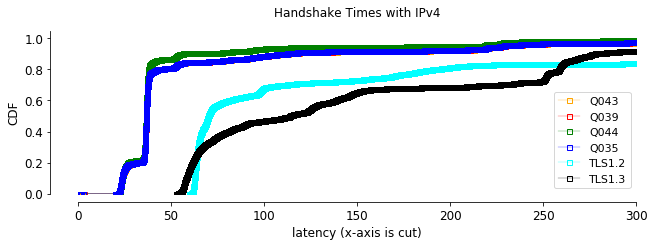

In [180]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 300])
ax.set_xscale('linear')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [181]:
x = Cdf.MakeCdfFromList(quic43_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['ConnectionEstablishmentTime'].values)

In [182]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

percentile values distribution for Q039
50th Percentile:36.570000
90th Percentile:38.882000
99th Percentile:97.778000
25th Percentile:36.049000
75th Percentile:37.218000
20th Percentile:36.570000
40th Percentile:38.882000
60th Percentile:97.778000
80th Percentile:36.049000
percentile values distribution for tcp12
50th Percentile:70.578000
90th Percentile:103.001000
99th Percentile:210.821000
25th Percentile:67.855000
75th Percentile:93.451000
20th Percentile:70.578000
40th Percentile:103.001000
60th Percentile:210.821000
80th Percentile:67.855000
percentile values distribution for Q044
50th Percentile:36.584000
90th Percentile:38.687000
99th Percentile:96.358000
25th Percentile:36.063000
75th Percentile:37.225000
20th Percentile:36.584000
40th Percentile:38.687000
60th Percentile:96.358000
80th Percentile:36.063000
percentile values distribution for tcp13
50th Percentile:61.424000
90th Percentile:126.397000
99th Percentile:149.221000
25th Percentile:57.881000
75th Percentile:74.251000


In [183]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

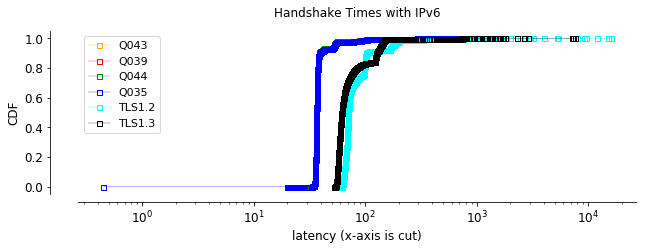

In [184]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6.png', format='png', bbox_inches='tight')

In [185]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [186]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [187]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

percentile values distribution for Q039
50th Percentile:206.054000
90th Percentile:552.900000
99th Percentile:907.832000
25th Percentile:140.449000
75th Percentile:265.531000
20th Percentile:206.054000
40th Percentile:552.900000
60th Percentile:907.832000
80th Percentile:140.449000
percentile values distribution for tcp12
50th Percentile:261.514000
90th Percentile:1238.354000
99th Percentile:4301.200000
25th Percentile:134.061000
75th Percentile:617.740000
20th Percentile:261.514000
40th Percentile:1238.354000
60th Percentile:4301.200000
80th Percentile:134.061000
percentile values distribution for Q044
50th Percentile:210.381000
90th Percentile:553.826000
99th Percentile:907.263000
25th Percentile:153.198000
75th Percentile:262.844000
20th Percentile:210.381000
40th Percentile:553.826000
60th Percentile:907.263000
80th Percentile:153.198000
percentile values distribution for tcp13
50th Percentile:360.345000
90th Percentile:1075.179000
99th Percentile:2853.419000
25th Percentile:169.87

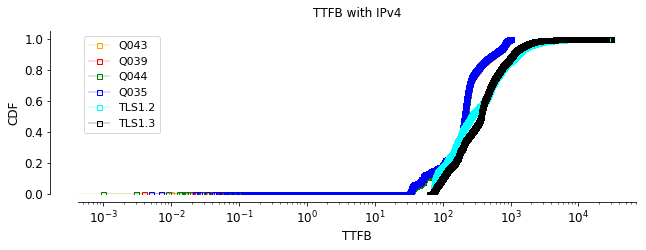

In [188]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [189]:
x = Cdf.MakeCdfFromList(quic43_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['TTFB'].values)

In [190]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [191]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

percentile values distribution for Q039
50th Percentile:206.178000
90th Percentile:292.271000
99th Percentile:843.262000
25th Percentile:174.034000
75th Percentile:234.882000
20th Percentile:206.178000
40th Percentile:292.271000
60th Percentile:843.262000
80th Percentile:174.034000
percentile values distribution for tcp12
50th Percentile:155.439000
90th Percentile:620.990000
99th Percentile:1963.436000
25th Percentile:113.265000
75th Percentile:269.357000
20th Percentile:155.439000
40th Percentile:620.990000
60th Percentile:1963.436000
80th Percentile:113.265000
percentile values distribution for Q044
50th Percentile:207.153000
90th Percentile:297.735000
99th Percentile:846.313000
25th Percentile:175.148000
75th Percentile:236.131000
20th Percentile:207.153000
40th Percentile:297.735000
60th Percentile:846.313000
80th Percentile:175.148000
percentile values distribution for tcp13
50th Percentile:213.468000
90th Percentile:816.463000
99th Percentile:2610.618000
25th Percentile:117.31700

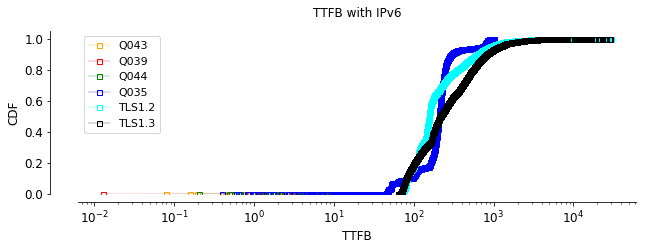

In [192]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6.png', format='png', bbox_inches='tight')

In [193]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [194]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [195]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

percentile values distribution for Q039
50th Percentile:212.068000
90th Percentile:607.421000
99th Percentile:922.201000
25th Percentile:148.449000
75th Percentile:285.429000
20th Percentile:212.068000
40th Percentile:607.421000
60th Percentile:922.201000
80th Percentile:148.449000
percentile values distribution for tcp12
50th Percentile:310.730000
90th Percentile:1406.195000
99th Percentile:4626.690000
25th Percentile:147.790000
75th Percentile:737.363000
20th Percentile:310.730000
40th Percentile:1406.195000
60th Percentile:4626.690000
80th Percentile:147.790000
percentile values distribution for Q044
50th Percentile:216.806000
90th Percentile:611.689000
99th Percentile:921.901000
25th Percentile:163.882000
75th Percentile:281.698000
20th Percentile:216.806000
40th Percentile:611.689000
60th Percentile:921.901000
80th Percentile:163.882000
percentile values distribution for tcp13
50th Percentile:386.176000
90th Percentile:1243.426000
99th Percentile:3181.165000
25th Percentile:181.95

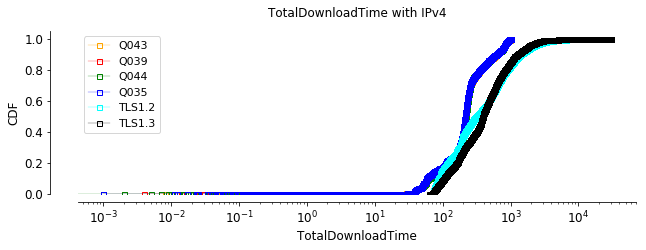

In [196]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')

In [197]:
x = Cdf.MakeCdfFromList(quic43_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['TotalDownloadTime'].values)

In [198]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [199]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

percentile values distribution for Q039
50th Percentile:210.628000
90th Percentile:324.926000
99th Percentile:848.441000
25th Percentile:178.770000
75th Percentile:240.364000
20th Percentile:210.628000
40th Percentile:324.926000
60th Percentile:848.441000
80th Percentile:178.770000
percentile values distribution for tcp12
50th Percentile:184.593000
90th Percentile:679.262000
99th Percentile:2199.417000
25th Percentile:115.536000
75th Percentile:297.237000
20th Percentile:184.593000
40th Percentile:679.262000
60th Percentile:2199.417000
80th Percentile:115.536000
percentile values distribution for Q044
50th Percentile:211.601000
90th Percentile:334.145000
99th Percentile:851.489000
25th Percentile:179.878000
75th Percentile:241.616000
20th Percentile:211.601000
40th Percentile:334.145000
60th Percentile:851.489000
80th Percentile:179.878000
percentile values distribution for tcp13
50th Percentile:235.045000
90th Percentile:886.510000
99th Percentile:2919.097000
25th Percentile:123.71300

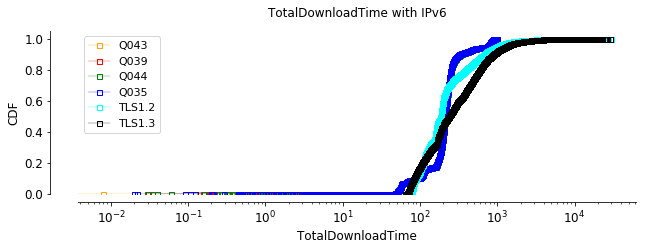

In [200]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6.png', format='png', bbox_inches='tight')